# Demo of `MotionList`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr

from pathlib import Path

HERE = Path().cwd()
BAPSF_MOTION = (HERE / ".." / ".." / ".." / "src").resolve()
sys.path.append(str(BAPSF_MOTION))

plt.rcParams.update(
    {
        # "figure.figsize": [12, 0.56 * 12],
        "figure.figsize": [10, 0.8 * 10],
        "font.size": 16,
    }
)

In [2]:
from bapsf_motion.motion_list import MotionList

Let's set up a typical rectangular grid for a probe on the East port.

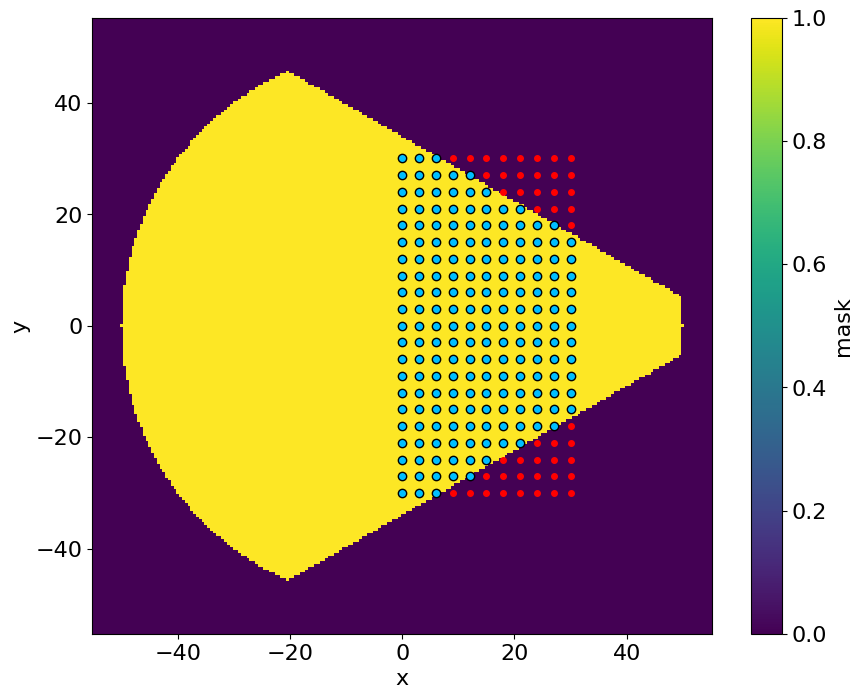

In [14]:
ml = MotionList(
    base_region=[
        {"label": "x", "range": [-55, 55], "num": 221},
        {"label": "y", "range": [-55, 55], "num": 221},
    ],
    exclusions=[
        {"type": "lapd", "port_location": "E", "cone_full_angle": 60},
    ],
    layers=[
        {"limits": [[0, 30], [-30, 30]], "steps": [11, 21]},
    ],
)

ml.mask.plot(x="x", y="y");

points = ml._ds["point_layer1"].data
flat_ax = np.prod(points.shape[:-1])
points = np.reshape(points, (flat_ax, points.shape[-1]))
pt1 = points
# print(pt1.shape)

plt.scatter(
    points[...,0],
    points[..., 1], s=4**2,
    color="red",
)

valid_points = ml.motion_list

plt.scatter(
    valid_points[..., 0],
    valid_points[..., 1],
    linewidth=1,
    s=6**2,
    facecolors="deepskyblue",
    edgecolors="black",
);

Let's say we want the same setup as before, but with a probe on the 45 degree port.  This is easily accomplished by just specifying the `port_location` as an angle for the LaPD exclusion layer.

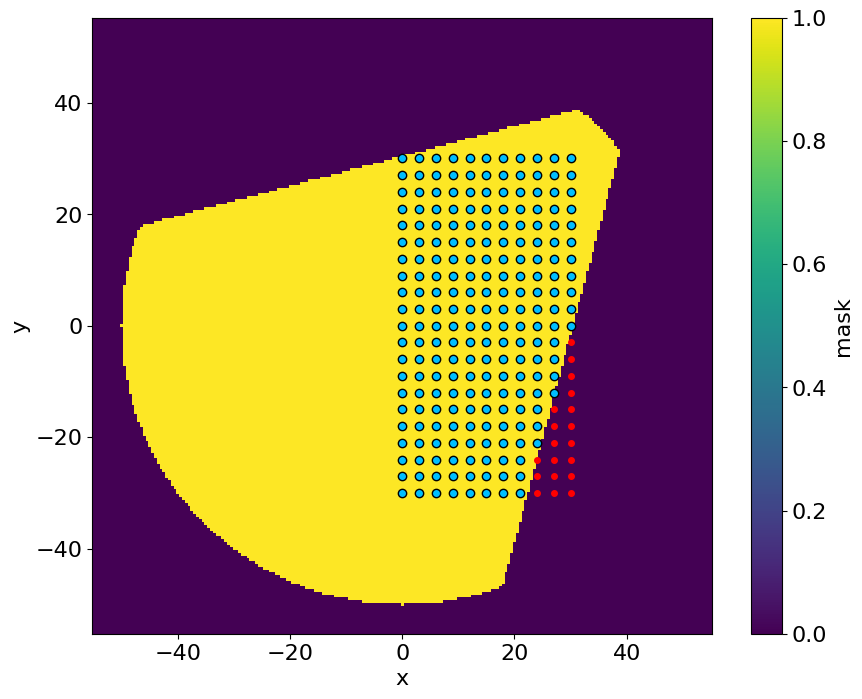

In [15]:
ml = MotionList(
    base_region=[
        {"label": "x", "range": [-55, 55], "num": 221},
        {"label": "y", "range": [-55, 55], "num": 221},
    ],
    exclusions=[
        {"type": "lapd", "port_location": 45, "cone_full_angle": 60},
    ],
    layers=[
        {"limits": [[0, 30], [-30, 30]], "steps": [11, 21]},
    ],
)

ml.mask.plot(x="x", y="y");

points = ml._ds["point_layer1"].data
flat_ax = np.prod(points.shape[:-1])
points = np.reshape(points, (flat_ax, points.shape[-1]))
pt1 = points
# print(pt1.shape)

plt.scatter(
    points[...,0],
    points[..., 1], s=4**2,
    color="red",
)

valid_points = ml.motion_list

plt.scatter(
    valid_points[..., 0],
    valid_points[..., 1],
    linewidth=1,
    s=6**2,
    facecolors="deepskyblue",
    edgecolors="black",
)


Let's se we just want a vertical line for a target in the top port.

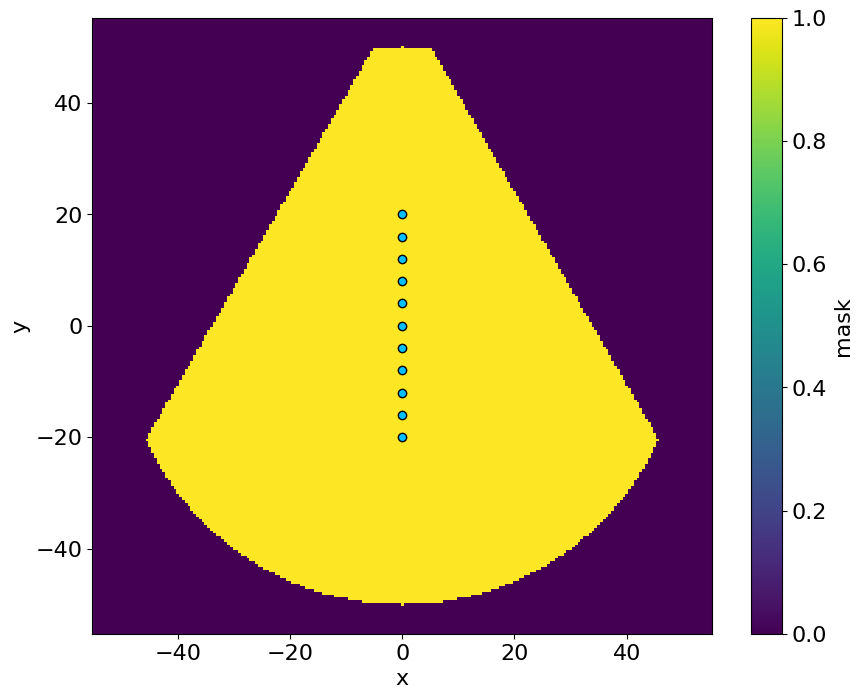

In [17]:
ml = MotionList(
    base_region=[
        {"label": "x", "range": [-55, 55], "num": 221},
        {"label": "y", "range": [-55, 55], "num": 221},
    ],
    exclusions=[
        {"type": "lapd", "port_location": "T", "cone_full_angle": 60},
    ],
    layers=[
        {"limits": [[0, 0], [-20, 20]], "steps": [1, 11]},
    ],
)

ml.mask.plot(x="x", y="y");

points = ml._ds["point_layer1"].data
flat_ax = np.prod(points.shape[:-1])
points = np.reshape(points, (flat_ax, points.shape[-1]))
pt1 = points
# print(pt1.shape)

plt.scatter(
    points[...,0],
    points[..., 1], s=4**2,
    color="red",
)

valid_points = ml.motion_list

plt.scatter(
    valid_points[..., 0],
    valid_points[..., 1],
    linewidth=1,
    s=6**2,
    facecolors="deepskyblue",
    edgecolors="black",
)


Let's say we have a probe onthe West port and want to take two grids of data where the first grid has a low density of points over a large area and the seconde gride has a high density of points over small area.  This is easily accomplished by just defining the two grids as separate layers.  The order in with the points will be taken depends on the order in which the layers are specified.  In this example, the low density grid is completely measured first and then followed by the high density grid.

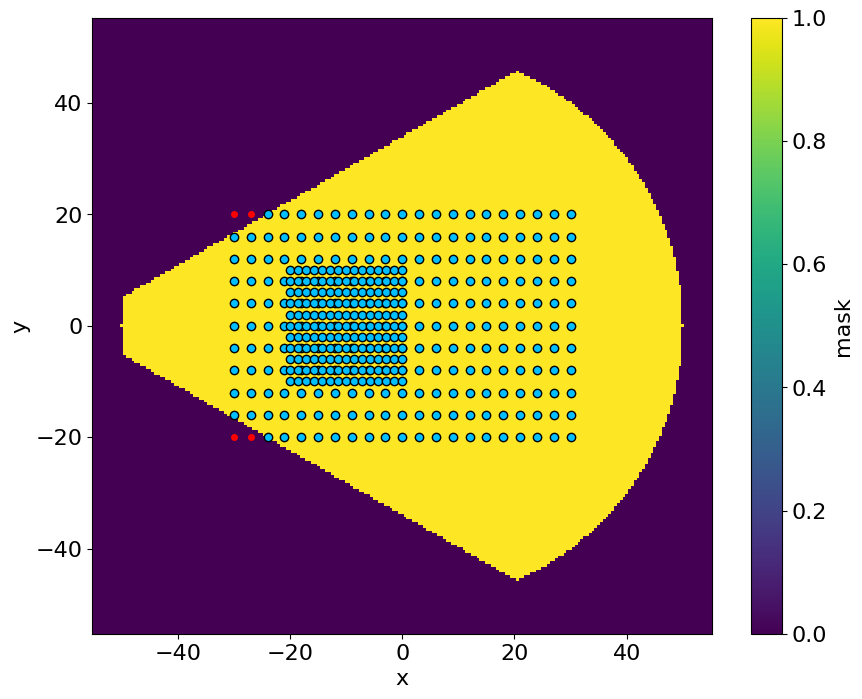

In [18]:
ml = MotionList(
    base_region=[
        {"label": "x", "range": [-55, 55], "num": 221},
        {"label": "y", "range": [-55, 55], "num": 221},
    ],
    exclusions=[
        {"type": "lapd", "port_location": "W", "cone_full_angle": 60},
    ],
    layers=[
        {"limits": [[-30, 30], [-20, 20]], "steps": [21, 11]},
        {"limits": [[-20, 0], [-10, 10]], "steps": [15, 11]},
    ],
)

ml.mask.plot(x="x", y="y");

for player in ml.layers:
    points = player.points.data
    flat_ax = np.prod(points.shape[:-1])
    points = np.reshape(points, (flat_ax, points.shape[-1]))

    plt.scatter(
        points[...,0],
        points[..., 1], s=4**2,
        color="red",
    )

valid_points = ml.motion_list

plt.scatter(
    valid_points[..., 0],
    valid_points[..., 1],
    linewidth=1,
    s=6**2,
    facecolors="deepskyblue",
    edgecolors="black",
)
